# Example notebook to show how to work with sxs waveforms

In [1]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

In [2]:
from gw_eccentricity.load_data import load_sxs_waveform
import matplotlib.pyplot as plt
import numpy as np

In [3]:
load_sxs_waveform?

Signature: load_sxs_waveform(**kwargs)
Docstring:
Load modes from sxs waveform files.

parameters:
----------
kwargs: Could be the followings
filepath: str
    Path to lvcnr file.

dt: float
    Time step to use for interpolating the waveform modes. Default is 0.1

include_zero_ecc: bool
    If True returns IMRPhenomT waveform mode for same set of parameters
    except eccentricity set to zero. Requires metadata file to get the
    binary parameters.
    Default is False.

metadata_path: str
    path to the metadata file. Required when include_zero_ecc is True.
    If provided, a dictionary containing binary mass ratio and spins are returned.

num_orbits_to_remove_as_junk: float
    Number of orbits to throw away as junk from the begining of the NR
    data. Default is 2.

mode_array: 1d array
    1d array containing list of modes to load.
    Default is [(2, 2)] which loads only the (2, 2) mode.

extrap_order: int
    Extrapolation order to use for loading the waveform data.
    Defau

In [8]:
kwargs = {"filepath": "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/040/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5",
         "mode_array": [(2, 2)],
         "include_zero_ecc": True,
         "metadata_path": "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/040/Lev3/metadata.txt"}
dataDict = load_sxs_waveform(**kwargs)

In [9]:
dataDict

{'t': array([-7966.31291599, -7966.21291599, -7966.11291599, ...,
          200.98708401,   201.08708401,   201.18708401]),
 'hlm': {(2,
   2): array([-3.36508375e-03-6.24732732e-02j, -3.48313645e-03-6.24820818e-02j,
         -3.60125918e-03-6.24906704e-02j, ...,
          5.97726258e-07-3.93951015e-06j,  5.95753058e-07-3.94035592e-06j,
          5.93752437e-07-3.94110001e-06j])},
 'params_dict': {'q': 1.000000012827989,
  'chi1': [-2.10130294623e-10, -2.31039177846e-10, -7.76335163061e-07],
  'chi2': [2.27711409718e-10, 2.00823151741e-10, -7.62496744538e-07]},
 't_zeroecc': array([-7967.32745039, -7967.22745039, -7967.12745039, ...,
          499.67254961,   499.77254961,   499.87254961]),
 'hlm_zeroecc': {(2,
   2): array([-7.46907622e-02+3.55858773e-02j, -7.45985073e-02+3.57794245e-02j,
         -7.45057504e-02+3.59727333e-02j, ...,
         -4.85532685e-20+2.72372810e-19j, -3.31271121e-20+2.72305434e-19j,
         -1.78592952e-20+2.71392622e-19j])}}

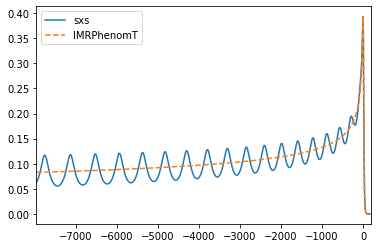

In [14]:
plt.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="sxs")
plt.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), label="IMRPhenomT", ls="--")
plt.xlim(dataDict["t"][0], 200)
plt.legend(loc="upper left")